In [16]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd

# 讀取 battles.csv
battles_df = pd.read_csv('/content/drive/MyDrive/碩一上課堂/1131_dataMining/dataMining/HW1/archive/battles.csv')

# 讀取 character-deaths.csv
character_deaths_df = pd.read_csv('/content/drive/MyDrive/碩一上課堂/1131_dataMining/dataMining/HW1/archive/character-deaths.csv')

# 讀取 character-predictions.csv
character_predictions_df = pd.read_csv('/content/drive/MyDrive/碩一上課堂/1131_dataMining/dataMining/HW1/archive/character-predictions.csv')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
battles_df.head()

,name,year,battle_number,attacker_king,defender_king,attacker_1,attacker_2,attacker_3,attacker_4,defender_1,...,major_death,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,summer,location,region,note
0,Battle of the Golden Tooth,298,1,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,...,1.0,0.0,15000.0,4000.0,Jaime Lannister,"Clement Piper, Vance",1.0,Golden Tooth,The Westerlands,NaN
1,Battle at the Mummer's Ford,298,2,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Baratheon,...,1.0,0.0,NaN,120.0,Gregor Clegane,Beric Dondarrion,1.0,Mummer's Ford,The Riverlands,NaN
2,Battle of Riverrun,298,3,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,...,0.0,1.0,15000.0,10000.0,"Jaime Lannister, Andros Brax","Edmure Tully, Tytos Blackwood",1.0,Riverrun,The Riverlands,NaN
3,Battle of the Green Fork,298,4,Robb Stark,Joffrey/Tommen Baratheon,Stark,NaN,NaN,NaN,Lannister,...,1.0,1.0,18000.0,20000.0,"Roose Bolton, Wylis Manderly, Medger Cerwyn, H...","Tywin Lannister, Gregor Clegane, Kevan Lannist...",1.0,Green Fork,The Riverlands,NaN
4,Battle of the Whispering Wood,298,5,Robb Stark,Joffrey/Tommen Baratheon,Stark,Tully,NaN,NaN,Lannister,...,1.0,1.0,1875.0,6000.0,"Robb Stark, Brynden Tully",Jaime Lannister,1.0,Whispering Wood,The Riverlands,NaN


In [6]:
character_deaths_df.head()

,Name,Allegiances,Death Year,Book of Death,Death Chapter,Book Intro Chapter,Gender,Nobility,GoT,CoK,SoS,FfC,DwD
0,Addam Marbrand,Lannister,NaN,NaN,NaN,56.0,1,1,1,1,1,1,0
1,Aegon Frey (Jinglebell),NaN,299.0,3.0,51.0,49.0,1,1,0,0,1,0,0
2,Aegon Targaryen,House Targaryen,NaN,NaN,NaN,5.0,1,1,0,0,0,0,1
3,Adrack Humble,House Greyjoy,300.0,5.0,20.0,20.0,1,1,0,0,0,0,1
4,Aemon Costayne,Lannister,NaN,NaN,NaN,NaN,1,1,0,0,1,0,0


In [7]:
character_predictions_df.head()

,S.No,actual,pred,alive,plod,name,title,male,culture,dateOfBirth,...,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,boolDeadRelations,isPopular,popularity,isAlive
0,1,0,0,0.054,0.946,Viserys II Targaryen,NaN,1,NaN,NaN,...,0.0,NaN,0,0,NaN,11,1,1,0.605351,0
1,2,1,0,0.387,0.613,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,...,NaN,1.0,1,1,97.0,1,1,1,0.896321,1
2,3,1,0,0.493,0.507,Addison Hill,Ser,1,NaN,NaN,...,NaN,NaN,0,1,NaN,0,0,0,0.267559,1
3,4,0,0,0.076,0.924,Aemma Arryn,Queen,0,NaN,82.0,...,NaN,0.0,1,1,23.0,0,0,0,0.183946,0
4,5,1,1,0.617,0.383,Sylva Santagar,Greenstone,0,Dornish,276.0,...,NaN,1.0,1,1,29.0,0,0,0,0.043478,1


In [8]:
battles_df.fillna(0, inplace=True)  # 將空值替換為0
character_deaths_df.fillna(0, inplace=True)  # 將空值替換為0
character_predictions_df.fillna(0, inplace=True)  # 將空值替換為0

In [9]:
# 將 'Death Year', 'Book of Death', 'Death Chapter' 這三個欄位進行處理
character_deaths_df['death_indicator'] = character_deaths_df[['Death Year', 'Book of Death', 'Death Chapter']].notna().any(axis=1).astype(int)

# 檢查處理後的結果
print(character_deaths_df[['Name', 'Death Year', 'Book of Death', 'Death Chapter', 'death_indicator']].head())

                      Name  Death Year  Book of Death  Death Chapter  \
0           Addam Marbrand         0.0            0.0            0.0   
1  Aegon Frey (Jinglebell)       299.0            3.0           51.0   
2          Aegon Targaryen         0.0            0.0            0.0   
3            Adrack Humble       300.0            5.0           20.0   
4           Aemon Costayne         0.0            0.0            0.0   

   death_indicator  
0                1  
1                1  
2                1  
3                1  
4                1  


In [10]:
# 將 Allegiances 轉成 dummy 特徵
character_deaths_df = pd.get_dummies(character_deaths_df, columns=['Allegiances'], prefix='Allegiance')

# 檢查處理後的結果
print(character_deaths_df.head())


                      Name  Death Year  Book of Death  Death Chapter  \
0           Addam Marbrand         0.0            0.0            0.0   
1  Aegon Frey (Jinglebell)       299.0            3.0           51.0   
2          Aegon Targaryen         0.0            0.0            0.0   
3            Adrack Humble       300.0            5.0           20.0   
4           Aemon Costayne         0.0            0.0            0.0   

   Book Intro Chapter  Gender  Nobility  GoT  CoK  SoS  ...  \
0                56.0       1         1    1    1    1  ...   
1                49.0       1         1    0    0    1  ...   
2                 5.0       1         1    0    0    0  ...   
3                20.0       1         1    0    0    0  ...   
4                 0.0       1         1    0    0    1  ...   

   Allegiance_House Tully  Allegiance_House Tyrell  Allegiance_Lannister  \
0                   False                    False                  True   
1                   False           

In [11]:
from sklearn.model_selection import train_test_split

# 假設 death_indicator 是我們要預測的目標特徵，X 是特徵資料，y 是目標變數
X = character_deaths_df.drop(columns=['death_indicator'])  # 這裡假設 'death_indicator' 是標籤
y = character_deaths_df['death_indicator']

# 將資料集拆分成訓練集與測試集，測試集佔 25%，訓練集佔 75%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# 檢查拆分後的資料形狀
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (687, 33)
X_test shape: (230, 33)
y_train shape: (687,)
y_test shape: (230,)


In [12]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# 載入 Iris 資料集
iris = load_iris()
X, y = iris.data, iris.target

# 將資料集拆分成訓練集 (75%) 和測試集 (25%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# 建立決策樹分類器
clf = DecisionTreeClassifier()

# 使用訓練集進行訓練
clf.fit(X_train, y_train)

# 使用測試集進行預測
y_pred = clf.predict(X_test)

# 計算準確率
accuracy = accuracy_score(y_test, y_pred)
print(f'Iris 資料集的預測準確率: {accuracy}')


Iris 資料集的預測準確率: 1.0


Confusion Matrix:
[[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]


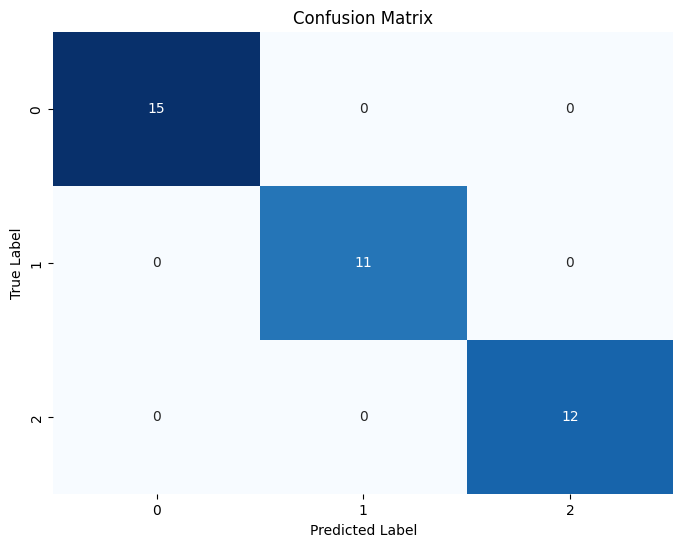

Precision: 1.00
Recall: 1.00
Accuracy: 1.00


In [28]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# 假設 y_test 是測試集的真實標籤，y_pred 是模型的預測結果
# 計算 Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# 打印 Confusion Matrix
print("Confusion Matrix:")
print(conf_matrix)

# 繪製 Confusion Matrix 圖表
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 計算 Precision, 使用 'weighted' average 處理多分類問題
precision = precision_score(y_test, y_pred, average='weighted')  # 改變 average 參數
print(f'Precision: {precision:.2f}')

# 計算 Recall, 使用 'weighted' average 處理多分類問題
recall = recall_score(y_test, y_pred, average='weighted')  # 改變 average 參數
print(f'Recall: {recall:.2f}')

# 計算 Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')


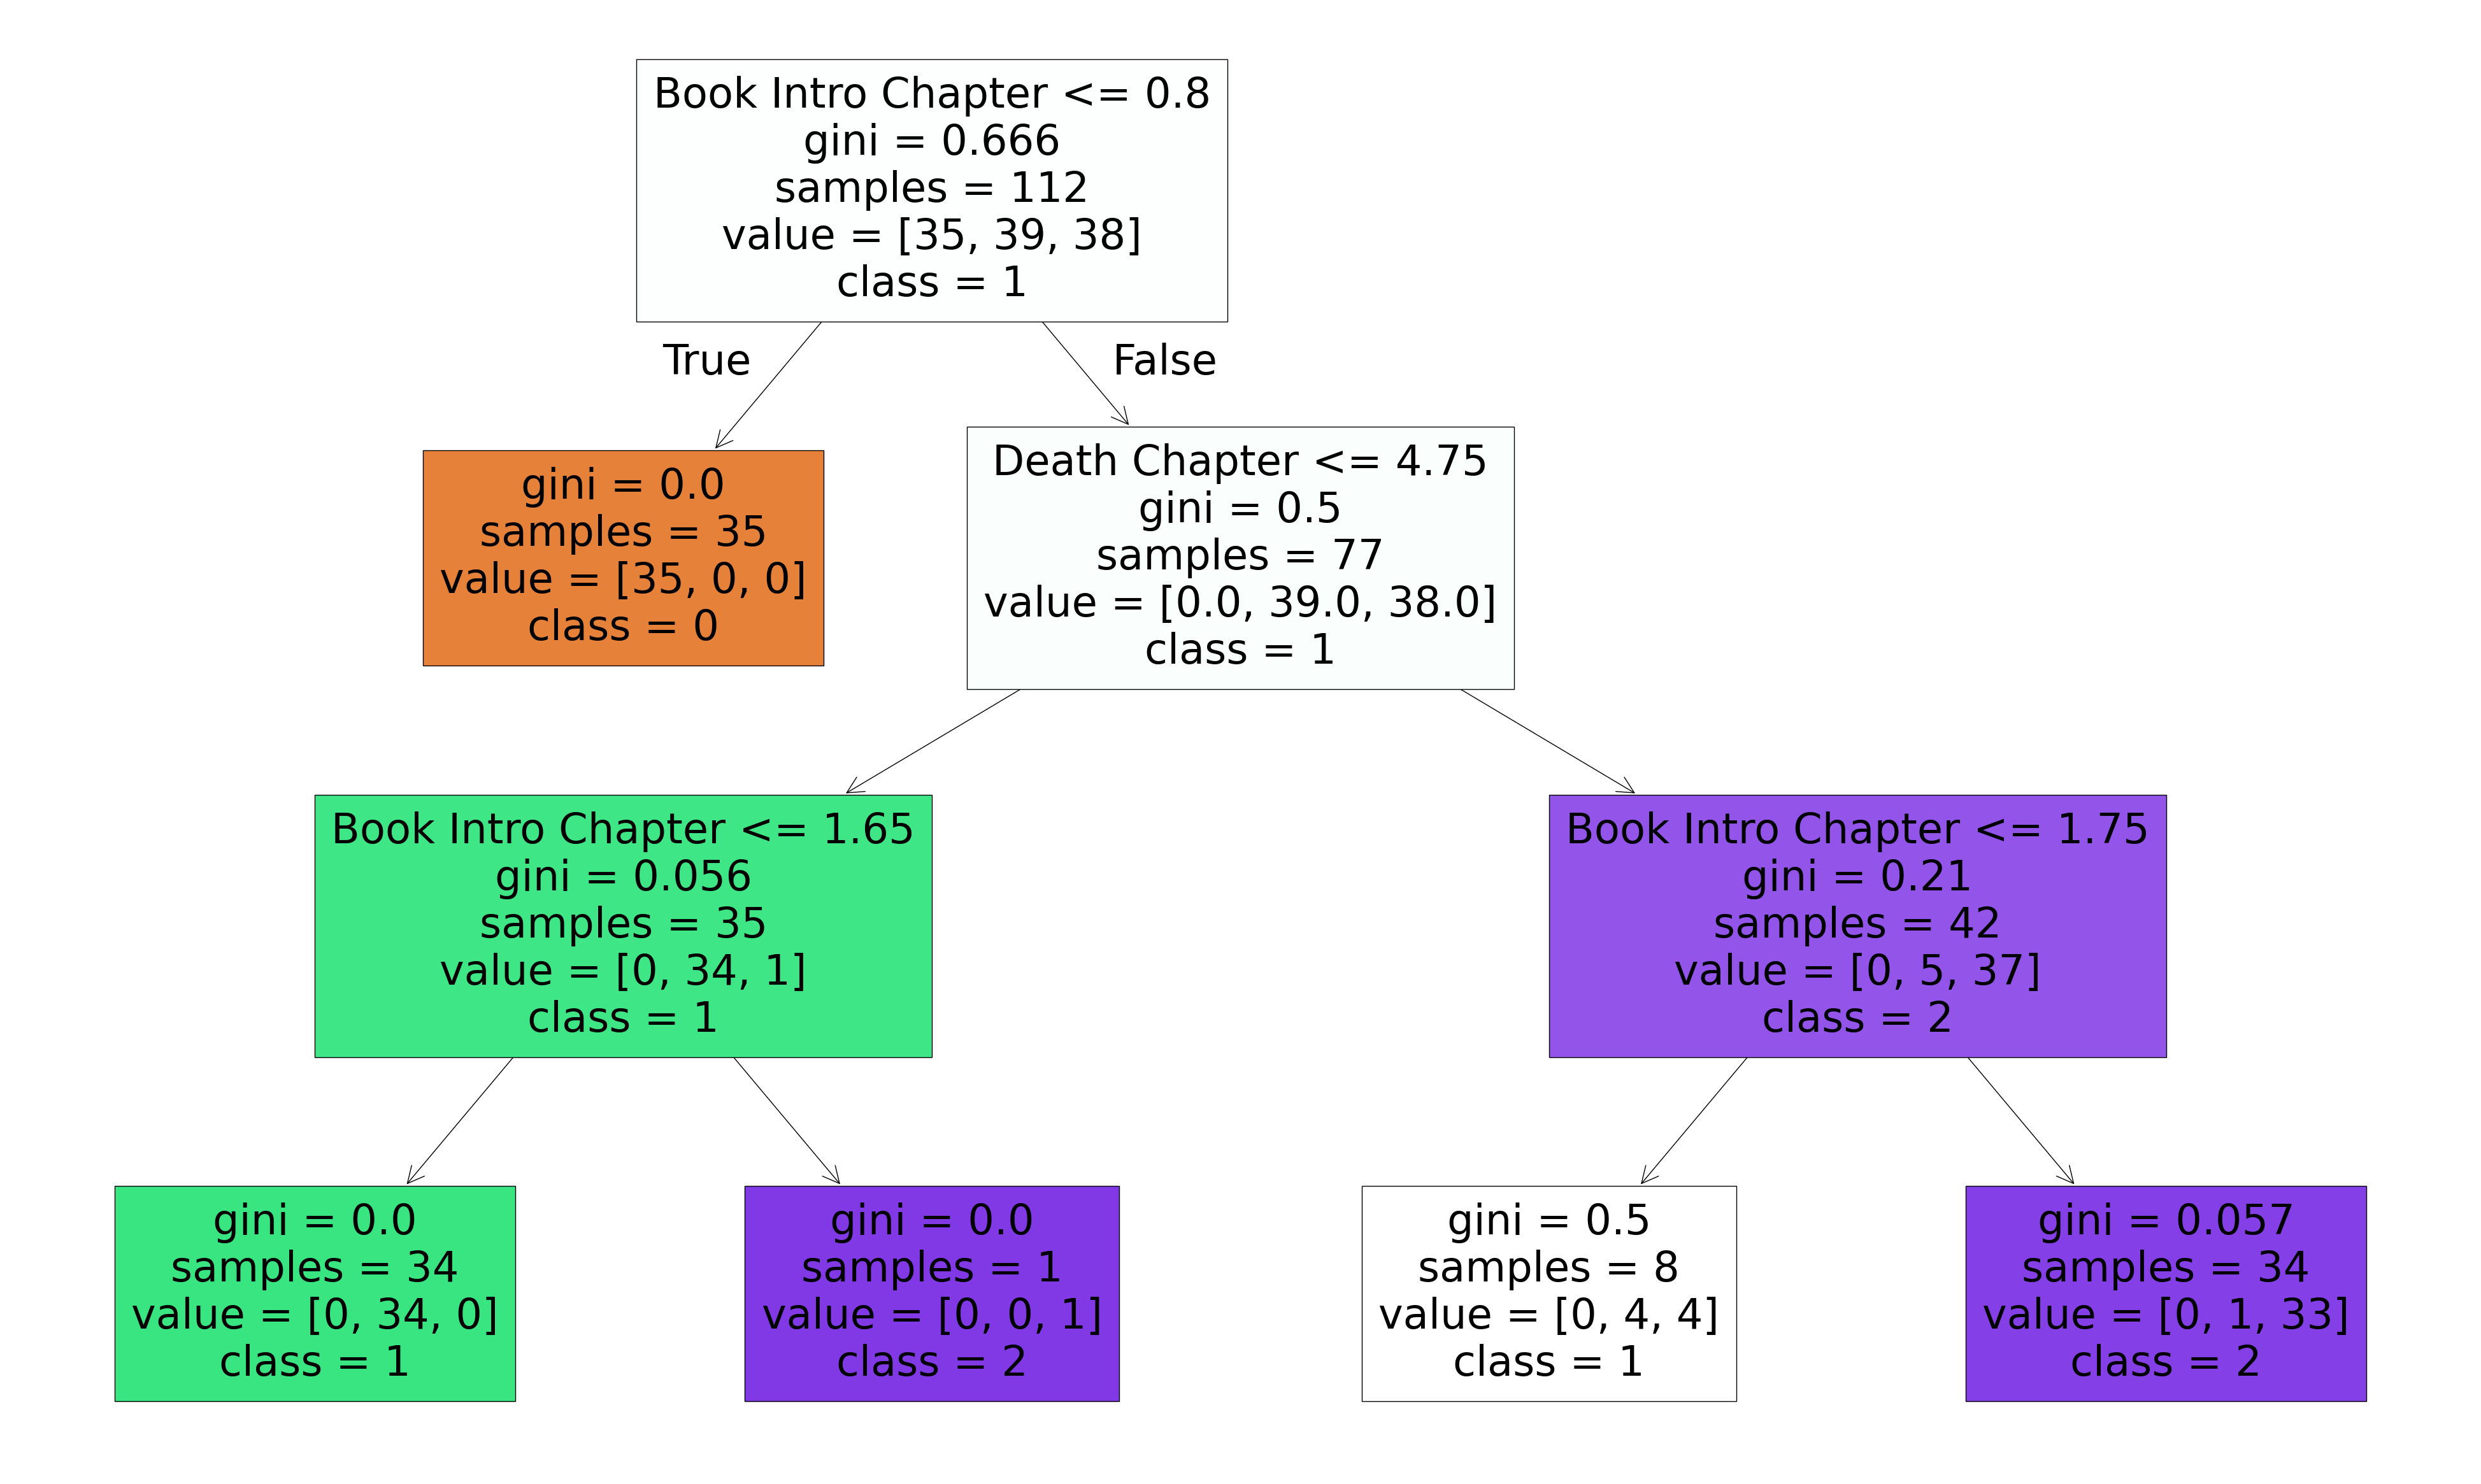

In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

# 建立決策樹分類器，限制樹的深度為 3
clf = DecisionTreeClassifier(max_depth=3)

# 使用訓練集進行訓練
clf.fit(X_train, y_train)

# 假設特徵名稱是來自於 character-deaths.csv，並且有以下特徵
feature_names = ['Death Year', 'Book of Death', 'Death Chapter', 'Book Intro Chapter', 'Gender',
                 'Nobility', 'GoT', 'CoK', 'SoS', 'FfC', 'DwD']  # 這些特徵可以根據你實際使用的來調整

# 獲取 y_train 中所有唯一的類別標籤
class_names = [str(c) for c in clf.classes_]  # 將類別標籤轉換為字符串列表

# 繪製決策樹的圖形
plt.figure(figsize=(50,30))  # 設定圖形大小
tree.plot_tree(clf, filled=True, feature_names=feature_names, class_names=class_names)  # 使用所有類別標籤
plt.show()


In [42]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# 讀取 character-deaths.csv 進行模型訓練
character_deaths_df = pd.read_csv('/content/drive/MyDrive/碩一上課堂/1131_dataMining/dataMining/HW1/archive/character-deaths.csv')

# 填補空值
character_deaths_df.fillna(0, inplace=True)

# 創建 death_indicator 欄位 (根據 'Death Year', 'Book of Death', 'Death Chapter')
character_deaths_df['death_indicator'] = character_deaths_df[['Death Year', 'Book of Death', 'Death Chapter']].notna().any(axis=1).astype(int)

# 檢查 death_indicator 是否成功創建
print(character_deaths_df[['Name', 'Death Year', 'Book of Death', 'Death Chapter', 'death_indicator']].head())

# 取出訓練資料中的特徵和標籤
X = character_deaths_df[['Death Year', 'Book of Death', 'Death Chapter', 'Gender']]
y = character_deaths_df['death_indicator']

# 將資料集拆分成訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# 建立決策樹分類器
clf = DecisionTreeClassifier(max_depth=3)

# 使用訓練集進行訓練
clf.fit(X_train, y_train)

# 讀取 character-predictions.csv 進行預測
character_predictions_df = pd.read_csv('/content/drive/MyDrive/碩一上課堂/1131_dataMining/dataMining/HW1/archive/character-predictions.csv')

# 進行特徵映射 (假設 'age' 對應到 'Death Year' 等特徵對應)
character_predictions_df.rename(columns={
    'age': 'Death Year',
    'book1': 'Book of Death',
    'book2': 'Death Chapter',
    'male': 'Gender'
}, inplace=True)

# 選擇與訓練時相同的特徵
X_new = character_predictions_df[['Death Year', 'Book of Death', 'Death Chapter', 'Gender']]

# 使用已訓練的模型進行預測
y_pred_new = clf.predict(X_new)

# 將預測結果存入新的資料框
character_predictions_df['Prediction'] = y_pred_new

# 將預測結果匯出為 CSV 檔案
character_predictions_df.to_csv('/content/drive/MyDrive/碩一上課堂/1131_dataMining/dataMining/HW1/archive/predict_with_predictions.csv', index=False)

print("預測結果已成功匯出為 CSV 檔案")


                      Name  Death Year  Book of Death  Death Chapter  \
0           Addam Marbrand         0.0            0.0            0.0   
1  Aegon Frey (Jinglebell)       299.0            3.0           51.0   
2          Aegon Targaryen         0.0            0.0            0.0   
3            Adrack Humble       300.0            5.0           20.0   
4           Aemon Costayne         0.0            0.0            0.0   

   death_indicator  
0                1  
1                1  
2                1  
3                1  
4                1  
預測結果已成功匯出為 CSV 檔案
